In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [76]:
td= pd.read_csv('bank-additional-full.csv',sep=';')

In [77]:
td

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [78]:
td.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [79]:
td.shape

(41188, 21)

In [80]:
td['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [81]:
td.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [82]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [83]:
int_column = td.dtypes[td.dtypes == 'int64'].index | td.dtypes[td.dtypes == 'float64'].index

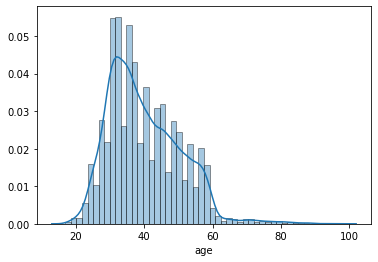

In [84]:
sns.distplot(td['age'],hist= True,hist_kws={'edgecolor':'black'} )

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

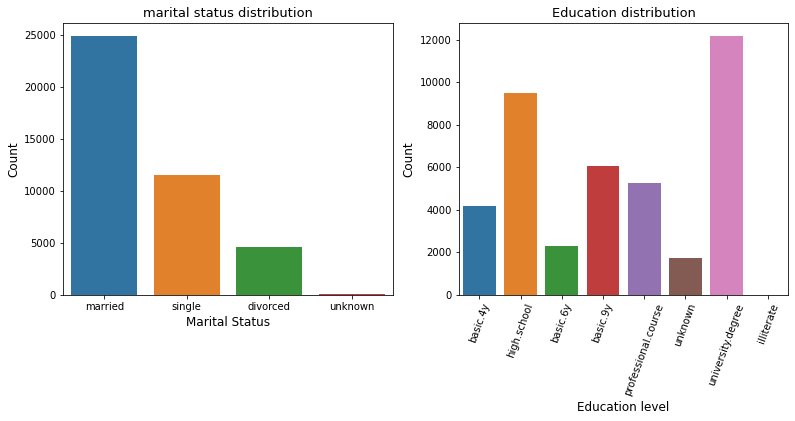

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
# First plot for marital status
sns.countplot(x = "marital", data = td, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution
sns.countplot(x = "education", data = td, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)


Text(0, 0.5, 'Count')

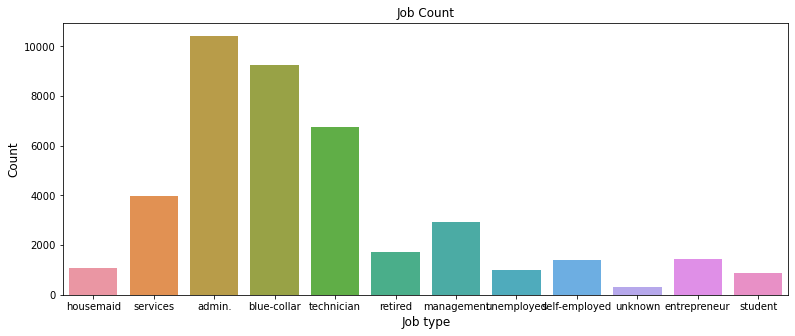

In [86]:
fig,ax =plt.subplots(figsize=(13,5))
sns.countplot(x='job', data=td)
ax.set_title('Job Count',fontsize= 12)
ax.set_xlabel('Job type',fontsize= 12)
ax.set_ylabel('Count',fontsize= 12)

Text(0, 0.5, 'Count')

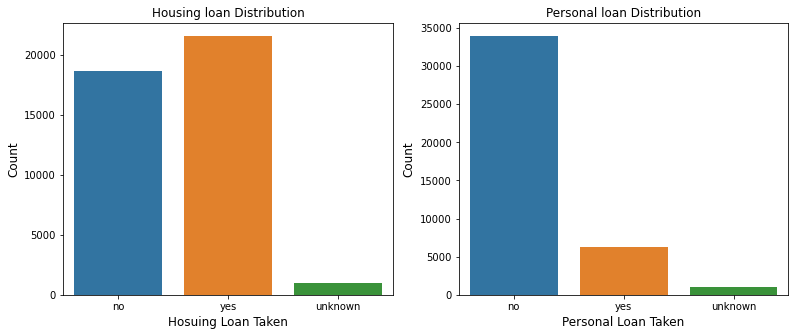

In [87]:
fig,(ax1,ax2)= plt.subplots(nrows= 1, ncols=2, figsize=(13,5))

sns.countplot(x='housing', data= td,ax= ax1)
ax1.set_title('Housing loan Distribution',fontsize=12)
ax1.set_xlabel('Hosuing Loan Taken',fontsize=12)
ax1.set_ylabel('Count',fontsize=12)

sns.countplot(x='loan', data= td, ax= ax2)
ax2.set_title('Personal loan Distribution',fontsize=12)
ax2.set_xlabel('Personal Loan Taken',fontsize=12)
ax2.set_ylabel('Count',fontsize=12)


In [88]:
print('Number of people with credit default:',td[td['default']== 'yes']['default'].count())
print('Number of people with no credit default:',td[td['default']== 'no']['default'].count())
print('Number of people whose credit default is unknown:',td[td['default']== 'unknown']['default'].count())
      

Number of people with credit default: 3
Number of people with no credit default: 32588
Number of people whose credit default is unknown: 8597


In [89]:
print('Number of people with Hosuing Loan:',td[td['housing']== 'yes']['housing'].count())
print('Number of people with no Hosuing Loan:',td[td['housing']== 'no']['housing'].count())
print('Number of people whose Hosuing Loan status is unknown:',td[td['housing']== 'unknown']['housing'].count())
      

Number of people with Hosuing Loan: 21576
Number of people with no Hosuing Loan: 18622
Number of people whose Hosuing Loan status is unknown: 990


In [90]:
print('Number of people with Personal Loan:',td[td['loan']== 'yes']['loan'].count())
print('Number of people with no Personal Loan:',td[td['loan']== 'no']['loan'].count())
print('Number of people whose Personal Loan status is unknown:',td[td['loan']== 'unknown']['loan'].count())
      

Number of people with Personal Loan: 6248
Number of people with no Personal Loan: 33950
Number of people whose Personal Loan status is unknown: 990


Text(0, 0.5, 'Count')

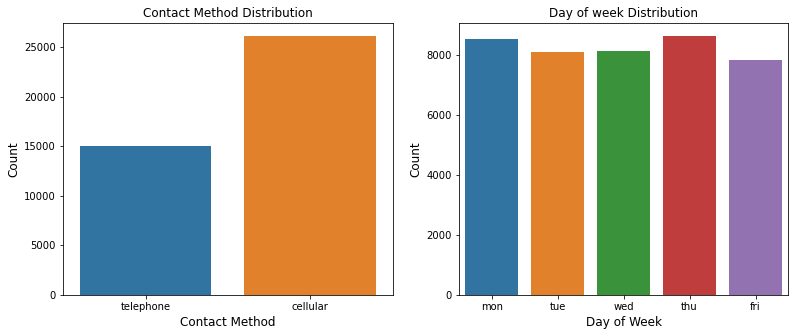

In [91]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(13,5))

sns.countplot(x='contact',data=td,ax=ax1)
ax1.set_title('Contact Method Distribution',fontsize= 12)
ax1.set_xlabel('Contact Method',fontsize= 12)
ax1.set_ylabel('Count',fontsize= 12)


sns.countplot(x='day_of_week',data= td,ax= ax2)
ax2.set_title('Day of week Distribution',fontsize= 12)
ax2.set_xlabel('Day of Week',fontsize= 12)
ax2.set_ylabel('Count',fontsize= 12)


In [92]:
#Checking if there exists a relation between Duration of call and Jobs

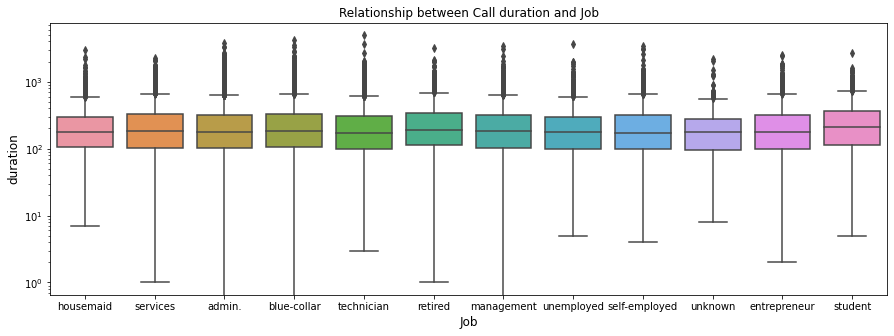

In [93]:
fig, ax= plt.subplots(figsize=(15,5))
sns.boxplot(x='job',y='duration',data=td,orient='v')
ax.set_title('Relationship between Call duration and Job')
ax.set_xlabel('Job',fontsize=12)
ax.set_ylabel('duration',fontsize=12)
ax.set_yscale('log')

Text(0.5, 1.0, 'log(Duration) vs Education')

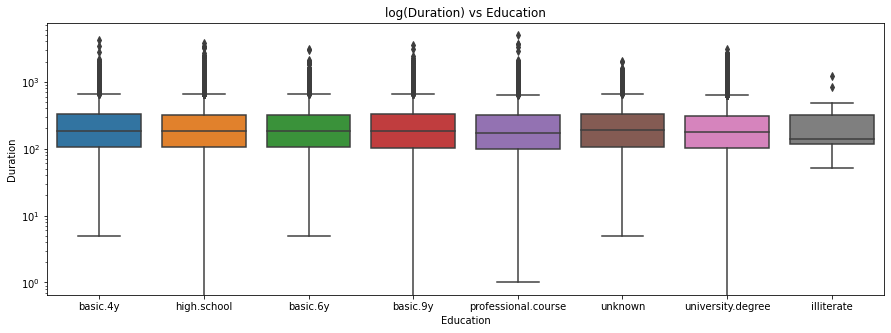

In [94]:
#Checking if there is a relation between average duration of call and eduacation

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = td, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")


From the above graph we can observe that the average duration of call is less with illiterates.

Text(0.5, 1.0, 'marketing campaign vs outcome')

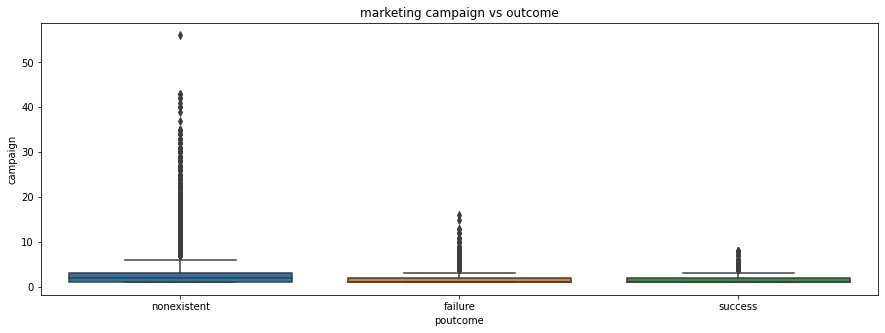

In [95]:
#Checking if there is a relation between marketing campaign and it's outcome

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "poutcome", y = "campaign", data = td, orient = 'v')
ax.set_xlabel("poutcome")
ax.set_ylabel("campaign")
ax.set_title("marketing campaign vs outcome")


We can see the failure and success is same whereas there as nonexistent cusomters are high even after performing marketing campaign

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le= LabelEncoder()

In [98]:
td["job"] = le.fit_transform(td["job"])
td["marital"] = le.fit_transform(td["marital"])
td["education"] = le.fit_transform(td["education"])
td["default"] = le.fit_transform(td["default"])
td["housing"] = le.fit_transform(td["housing"])
td["loan"] = le.fit_transform(td["loan"])
td["contact"] = le.fit_transform(td["contact"])
td["month"] = le.fit_transform(td["month"])
td["day_of_week"] = le.fit_transform(td["day_of_week"])
td["poutcome"] = le.fit_transform(td["poutcome"])
td["y"] = le.fit_transform(td["y"])

In [99]:
pd.set_option('max_columns',None)
td.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [100]:
td['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

This is an imbalanced dataset. We will try both oversampling and undersampling methods and will understand which models gives better result.

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
td_x= td.drop('y',axis=1)
td_y= td['y']

In [103]:
sm= SMOTE()
x_train_sm,y_train_sm= sm.fit_resample(td_x,td_y)

In [104]:
x_train_sm['y_train_sm']=y_train_sm

In [105]:
x_train_sm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_train_sm
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [106]:
x_train_sm.shape

(73096, 21)

In [107]:
x_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73096 non-null  int64  
 1   job             73096 non-null  int32  
 2   marital         73096 non-null  int32  
 3   education       73096 non-null  int32  
 4   default         73096 non-null  int32  
 5   housing         73096 non-null  int32  
 6   loan            73096 non-null  int32  
 7   contact         73096 non-null  int32  
 8   month           73096 non-null  int32  
 9   day_of_week     73096 non-null  int32  
 10  duration        73096 non-null  int64  
 11  campaign        73096 non-null  int64  
 12  pdays           73096 non-null  int64  
 13  previous        73096 non-null  int64  
 14  poutcome        73096 non-null  int32  
 15  emp.var.rate    73096 non-null  float64
 16  cons.price.idx  73096 non-null  float64
 17  cons.conf.idx   73096 non-null 

In [108]:
int_column = td.dtypes[td.dtypes == 'int32'].index | td.dtypes[td.dtypes == 'float64'].index

In [109]:
X= x_train_sm.drop('y_train_sm',axis=1)
Y= x_train_sm['y_train_sm']

In [110]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=0,test_size=0.3)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier 
from xgboost import XGBClassifier

In [123]:
dt= DecisionTreeClassifier(criterion= 'entropy', splitter='best')

In [124]:
model= dt.fit(x_train,y_train)

In [125]:
pred= model.predict(x_test)

In [147]:
from sklearn.metrics import classification_report,auc,roc_auc_score,accuracy_score,roc_curve,confusion_matrix

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10857
           1       0.92      0.94      0.93     11072

    accuracy                           0.93     21929
   macro avg       0.93      0.93      0.93     21929
weighted avg       0.93      0.93      0.93     21929



In [149]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier()
 

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12),
               RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('xgb', clf3)], voting ='soft')
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_accuracy= accuracy_score(y_train, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train,  y_train_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\manis\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\manis\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 26.5 s


In [150]:
result_table.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
DecisionTreeClassifier,"[0.0, 0.12794363784983068, 1.0]","[0.0, 0.9265583294080704, 1.0]","[0.0, 0.1280280003684259, 1.0]","[0.0, 0.9281972543352601, 1.0]",0.899193,0.900360,0.899307,0.900085,0.903910,0.880861,0.928197,"[[9467, 1390], [795, 10277]]","{'0': {'precision': 0.9225297213018905, 'recal..."
RandomForestClassifier,"[0.0, 0.02588455101008135, 1.0]","[0.0, 0.9897943162191867, 1.0]","[0.0, 0.0731325412176476, 1.0]","[0.0, 0.9657695086705202, 1.0]",0.981922,0.946509,0.981955,0.946318,0.948003,0.930878,0.965770,"[[10063, 794], [379, 10693]]","{'0': {'precision': 0.9637042712124114, 'recal..."
XGBClassifier,"[0.0, 0.06897357051107392, 1.0]","[0.0, 0.9595305385460826, 1.0]","[0.0, 0.07819839734733351, 1.0]","[0.0, 0.956195809248555, 1.0]",0.945219,0.939167,0.945278,0.938999,0.940732,0.925761,0.956196,"[[10008, 849], [485, 10587]]","{'0': {'precision': 0.9537787096159345, 'recal..."
Model Ensemble,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[0.0, 0.0668693009118541, 1.0]","[0.0, 0.9596278901734104, 1.0]",1.000000,0.946509,1.000000,0.946379,0.947688,0.936041,0.959628,"[[10131, 726], [447, 10625]]","{'0': {'precision': 0.9577424844015882, 'recal..."


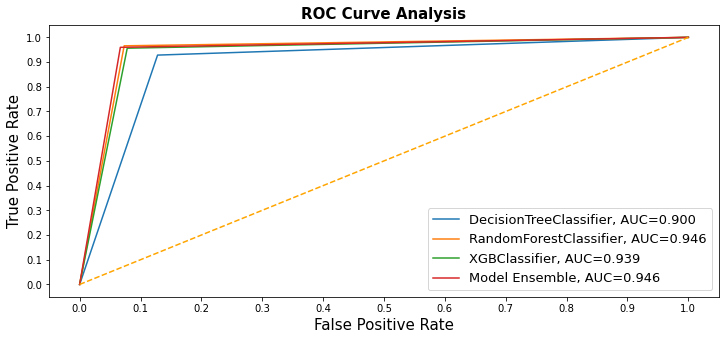

In [160]:
fig = plt.figure(figsize=(12,5))

for i in range(result_table.shape[0]):
    plt.plot(result_table.iloc[i,]['fpr'], 
             result_table.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()


we can see after performing SMOTE and trying various model, Random Forest Classifier is giving 94.6% accuracy

Undesampling

In [161]:
from imblearn.under_sampling import TomekLinks

In [163]:
tl = TomekLinks(sampling_strategy='majority')

In [164]:
x_tl, y_tl= tl.fit_sample(td_x,td_y)

In [170]:
x_tl['y_tl']=y_tl

In [171]:
X1= x_tl.drop('y_tl',axis=1)
Y1= x_tl['y_tl']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X1,Y1,random_state=0,test_size=0.3)

In [172]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier()
 

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12),
               RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('xgb', clf3)], voting ='soft')
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_accuracy= accuracy_score(y_train, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train,  y_train_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\manis\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\manis\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 27.8 s


In [173]:
result_table.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
DecisionTreeClassifier,"[0.0, 0.03440292445166531, 1.0]","[0.0, 0.6409406089840217, 1.0]","[0.0, 0.03633802816901408, 1.0]","[0.0, 0.6296296296296297, 1.0]",0.927050,0.926752,0.803269,0.796646,0.655132,0.682787,0.629630,"[[10263, 387], [490, 833]]","{'0': {'precision': 0.9544313214916768, 'recal..."
RandomForestClassifier,"[0.0, 0.009463850528025996, 1.0]","[0.0, 0.8375037684654808, 1.0]","[0.0, 0.03530516431924883, 1.0]","[0.0, 0.6674225245653818, 1.0]",0.972366,0.931847,0.914020,0.816059,0.683966,0.701350,0.667423,"[[10274, 376], [440, 883]]","{'0': {'precision': 0.9589322381930184, 'recal..."
XGBClassifier,"[0.0, 0.027741673436230706, 1.0]","[0.0, 0.7163099186011456, 1.0]","[0.0, 0.03690140845070423, 1.0]","[0.0, 0.6817838246409675, 1.0]",0.941869,0.932014,0.844284,0.822441,0.689076,0.696525,0.681784,"[[10257, 393], [421, 902]]","{'0': {'precision': 0.9605731410376475, 'recal..."
Model Ensemble,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[0.0, 0.04018779342723005, 1.0]","[0.0, 0.6432350718065004, 1.0]",1.000000,0.924831,1.000000,0.801524,0.654112,0.665364,0.643235,"[[10222, 428], [472, 851]]","{'0': {'precision': 0.9558631008041892, 'recal..."


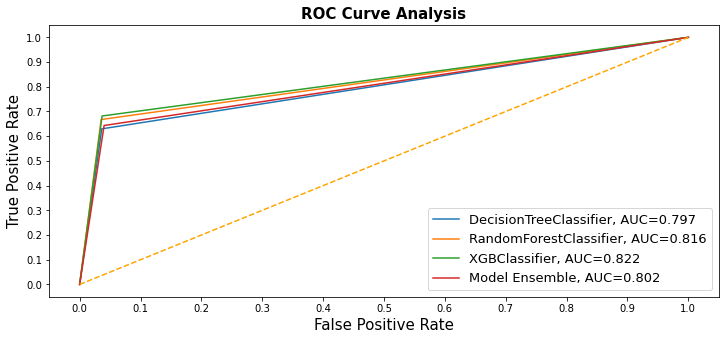

In [174]:
fig = plt.figure(figsize=(12,5))

for i in range(result_table.shape[0]):
    plt.plot(result_table.iloc[i,]['fpr'], 
             result_table.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

we can observe that undersampling doesn't perform when compared with oversampling. So,Random Forest Classifier with SMOTE performs better.